In [1]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
audio_dir = 'data/fma_small/'

In [8]:
def get_tids_from_directory(audio_dir):
    tids = []
    for _, dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            tids.extend(int(file[:-4]) for file in files if not file[0] == '.')
    return tids


def get_audio_path(audio_dir, track_id):
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')

In [10]:
#Grabbing all track_ids available
tids = get_tids_from_directory(audio_dir)

#TODO:Verify length of tracks in dataset -- Update: Length < 8000 due to corrupted files
len(tids)

2655

In [11]:
def create_spectogram(track_id):
    filename = get_audio_path(audio_dir, track_id)
    y, sr = librosa.load(filename)
    spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    spec = librosa.power_to_db(spec, ref=np.max)
    return spec.T

In [17]:
def plot_spec(track_id):
    spec = create_spectogram(track_id)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spec.T, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

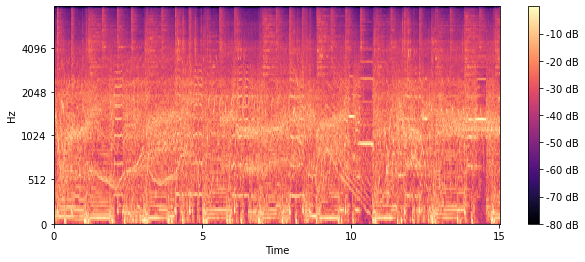

In [18]:
plot_spec(2012);

Load dataset with genre and track ID

In [45]:
filepath = 'data/fma_metadata/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])


In [48]:
needed_cols = [('set', 'split'), ('set', 'subset'), ('track', 'genre_top')]

#Dataframe with all needed columns
main_df = tracks[needed_cols]
main_df = main_df.loc[main_df[('set', 'subset')] == 'small']
main_df['track_id'] = main_df.index

In [51]:
main_df[('track', 'genre_top')].unique()

array(['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International',
       'Electronic', 'Instrumental'], dtype=object)

In [82]:
genres_dict = {'Electronic':1, 'Experimental':2, 'Folk':3, 'Hip-Hop':4, 
               'Instrumental':5,'International':6, 'Pop' :7, 'Rock': 8  }

Create arrays of each genre

In [85]:
def create_array(df):
    genres = []
    X_spect = np.empty((0, 640, 128))
    count = 0
    for index, row in df.iterrows():
        try:
            count += 1
            track_id = int(row['track_id'])
            genre = str(row[('track', 'genre_top')])
            spect = create_spectogram(track_id)

            # Normalize for small shape differences
            spect = spect[:640, :]
            X_spect = np.append(X_spect, [spect], axis=0)
            genres.append(genres_dict[genre])
            if count % 100 == 0:
                print("Currently processing: ", count)
        except:
            print("Couldn't process: ", count)
            continue
    y_arr = np.array(genres)
    return X_spect, y_arr

In [80]:
main_df[('set', 'split')].unique()

array(['training', 'validation', 'test'], dtype=object)

Creating the training, testing and validation subsets

In [64]:
df_train = main_df[main_df[('set', 'split')] == 'training']
df_test = main_df[main_df[('set', 'split')] == 'test']
df_valid = main_df[main_df[('set', 'split')] == 'validation']

print(df_train.shape, df_test.shape, df_valid.shape)

(6400, 4) (800, 4) (800, 4)


In [65]:
#Creating test subset with label
X_test, y_test = create_array(df_test)
np.savez('test', X_test, y_test)

TypeError: cannot unpack non-iterable NoneType object

In [86]:
#Creating validation set
X_valid, y_valid = create_array(df_valid)
np.savez('valid_arr', X_valid, y_valid)

c:\users\bryancam\anaconda3\envs\aa\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Couldn't process:  1
Couldn't process:  2
Couldn't process:  3
Couldn't process:  4
Couldn't process:  5
Couldn't process:  6
Couldn't process:  7
Couldn't process:  15
Couldn't process:  16
Couldn't process:  17
Couldn't process:  18
Couldn't process:  19
Couldn't process:  20
Couldn't process:  21
Couldn't process:  22
Couldn't process:  23
Couldn't process:  24
Couldn't process:  25
Couldn't process:  26
Couldn't process:  27
Couldn't process:  28
Couldn't process:  29
Couldn't process:  30
Couldn't process:  31
Couldn't process:  32
Couldn't process:  33
Couldn't process:  34
Couldn't process:  35
Couldn't process:  36
Couldn't process:  37
Couldn't process:  38
Couldn't process:  39
Couldn't process:  40
Couldn't process:  41
Couldn't process:  42
Couldn't process:  43
Couldn't process:  44
Couldn't process:  45
Couldn't process:  46
Couldn't process:  47
Couldn't process:  48
Couldn't process:  49
Couldn't process:  50
Couldn't process:  51
Couldn't process:  52
Couldn't process:

Couldn't process:  513
Couldn't process:  514
Couldn't process:  515
Couldn't process:  516
Couldn't process:  517
Couldn't process:  518
Couldn't process:  519
Couldn't process:  520
Couldn't process:  521
Couldn't process:  522
Couldn't process:  538
Couldn't process:  539
Couldn't process:  540
Couldn't process:  541
Couldn't process:  542
Couldn't process:  543
Couldn't process:  544
Couldn't process:  545
Couldn't process:  546
Couldn't process:  547
Couldn't process:  548
Couldn't process:  549
Couldn't process:  550
Couldn't process:  551
Couldn't process:  552
Couldn't process:  553
Couldn't process:  554
Couldn't process:  555
Couldn't process:  556
Couldn't process:  557
Couldn't process:  558
Couldn't process:  559
Couldn't process:  560
Couldn't process:  561
Couldn't process:  562
Couldn't process:  563
Couldn't process:  564
Couldn't process:  565
Couldn't process:  566
Couldn't process:  567
Couldn't process:  568
Couldn't process:  569
Couldn't process:  570
Couldn't pr

In [ ]:
X_valid, y_valid = create_array(df_valid)
np.savez('train_arr', X_valid, y_valid)